用同一个数据集、相同的方法评估不同的模型

In [1]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt

In [3]:
file_1=r'E:\machine_learning\DATA\pima-indians-diabetes-database\diabetes.csv'
data=read_csv(file_1)
array=data.values
X=array[:,:-1]
Y=array[:,-1]

In [4]:
kfold=KFold(n_splits=10,random_state=7)

In [5]:
models={}

In [12]:
models['LR']=LogisticRegression(solver='liblinear')
models['LDA']=LinearDiscriminantAnalysis()
models['KNN']=KNeighborsClassifier()
models['CART']=DecisionTreeClassifier()
models['SVM']=SVC(gamma='auto')
models['NB']=GaussianNB()

In [13]:
results=[]

In [14]:
for name in models:
    result=cross_val_score(models[name],X,Y,cv=kfold)
    results.append(result)
    msg='%s: %.3f (%.3f)'%(name, result.mean(),result.std())
    print(msg)

LR: 0.770 (0.048)
LDA: 0.773 (0.052)
KNN: 0.727 (0.062)
CART: 0.689 (0.058)
SVM: 0.651 (0.072)
NB: 0.755 (0.043)


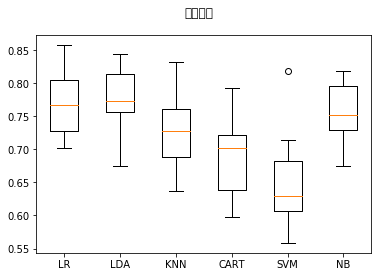

In [16]:
fig=plt.figure()
fig.suptitle('算法比较')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()